## Domain: Telecommunication
### Dataset: Churn Dataset

The dataset includes information about:

- **Customers who left within the last month:** The column is called Churn, indicating whether a customer has churned or not.

- **Services that each customer has signed up for:** This includes phone service, multiple lines, internet service, online security, online backup, device protection, tech support, and streaming TV and movies.

- **Customer account information:** This includes how long they’ve been a customer (tenure), contract type (month-to-month, one year, two years), payment method, paperless billing (whether they opt for paperless billing or not), monthly charges, and total charges.

- **Demographic information about customers:** This includes gender, age range, and whether they have partners and dependents.

#### Step 1: Loading the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "churn_dataset.csv"  # Loading the Dataset
data = pd.read_csv(file_path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
columns = data.columns.values
print(columns)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [4]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
total_charges_median = data['TotalCharges'].median()
data['TotalCharges'].fillna(total_charges_median, inplace=True)

In [6]:
data['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
df = pd.get_dummies(data.iloc[:, 1:])
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [7]:
columns = [
    'gender_Female', 'gender_Male',
    'Partner_No', 'Partner_Yes',
    'Dependents_No', 'Dependents_Yes',
    'PhoneService_No', 'PhoneService_Yes',
    'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
    'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaperlessBilling_No', 'PaperlessBilling_Yes',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

df[columns] = df[columns].astype(int)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


#### Step:2
- **Input and Output/Target Variables:** 
  - Input Variables: 
  - Output/Target Variable: 

- **Type of ML Task:**

- **Evaluation Metric:**
  - For regression task - Mean Absolute Error
  - For classification task - Accuracy

--- Findings 
- **Input and Output/Target Variables:** 
  - Input Variables: All columns except 'Churn'
  - Output/Target Variable: 'Churn'

- **Type of ML Task:** Classification

- **Evaluation Metric:** 
  - For classification task - Accuracy

#### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
y = df['Churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75:25 split

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5282, 45) (5282,)
Testing set shape: (1761, 45) (1761,)


#### Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

In [9]:
# For Numerical Variables - Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

X_train_numeric = numeric_transformer.fit_transform(X_train[numeric_features])
print("Standardized Numeric Features:", X_train_numeric)

Standardized Numeric Features: [[-1.28288214 -1.31004561 -0.99865161]
 [-1.03785653  0.34483164 -0.77823634]
 [-1.16036933 -1.48433058 -0.97209768]
 ...
 [-0.83366851 -1.44781373 -0.87481414]
 [-0.83366851  1.15152206 -0.48043091]
 [-0.26194207 -1.49262986 -0.80809849]]


In [10]:
# Categorical Variables - One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = [col for col in X_train.columns if col not in numeric_features]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)
])

X_train_categorical = preprocessor.fit_transform(X_train)
print("One-Hot Encoded Categorical Features:", X_train_categorical)

One-Hot Encoded Categorical Features: [[1. 0. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]]


#### Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

In [11]:
# For Numerical Variables - Standardization
X_test_numeric = numeric_transformer.transform(X_test[numeric_features])

print("Standardized Numeric Features (Test Data):", X_test_numeric)

Standardized Numeric Features (Test Data): [[-1.28288214 -1.32664418 -0.99887216]
 [ 0.35062198 -1.31170547 -0.57028201]
 [ 0.79983561 -1.50756857 -0.5547334 ]
 ...
 [-0.13942926  0.20374381 -0.14323568]
 [-1.24204454 -0.99799253 -0.98235315]
 [ 0.84067322  0.30001551  0.75626771]]


In [12]:
# Categorical Variables - One-Hot Encoding
X_test_categorical = preprocessor.transform(X_test)

print("One-Hot Encoded Categorical Features (Test Data):",X_test_categorical)

One-Hot Encoded Categorical Features (Test Data): [[1. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


In [26]:
from sklearn.neighbors import KNeighborsClassifier   # Importing Required Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

#### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest

In [15]:
# Train KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_categorical, y_train)

KNeighborsClassifier()

In [16]:
# Train Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train_categorical, y_train)

LogisticRegression()

In [17]:
# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_categorical, y_train)

SVC()

In [18]:
# Train Decision Trees classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_categorical, y_train)

DecisionTreeClassifier()

In [19]:
# Train Random Forest classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_categorical, y_train)

RandomForestClassifier()

#### Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use `metrics.accuracy_score(actual, predict)

In [36]:
# Predict using  KNN classifier
knn_predictions = knn_classifier.predict(X_test_categorical) 
knn = metrics.accuracy_score(y_test, knn_predictions)
print("KNN - Accuracy:", knn)

KNN - Accuracy: 0.7467348097671778


In [37]:
# Predict using Logistic Regression classifier
logistic_regression_predictions = logistic_regression_classifier.predict(X_test_categorical) 
logistic_regression = metrics.accuracy_score(y_test, logistic_regression_predictions)
print("Logistic Regression - Accuracy:", logistic_regression)

Logistic Regression - Accuracy: 0.7910278250993753


In [38]:
# Predict using the trained SVM classifier
svm_predictions = svm_classifier.predict(X_test_categorical)
svm = metrics.accuracy_score(y_test, svm_predictions)
print("Support Vector Machines - Accuracy:", svm)

Support Vector Machines - Accuracy: 0.7836456558773425


In [39]:
# Predict using Decision Trees classifier
decision_tree_predictions = decision_tree_classifier.predict(X_test_categorical)
decision_tree = metrics.accuracy_score(y_test, decision_tree_predictions)
print("Decision Trees - Accuracy:", decision_tree)

Decision Trees - Accuracy: 0.7024417944349801


In [40]:
# Predict using Random Forest classifier
random_forest_predictions = random_forest_classifier.predict(X_test_categorical) 
random_forest = metrics.accuracy_score(y_test, random_forest_predictions)
print("Random Forest - Accuracy:", random_forest)

Random Forest - Accuracy: 0.7558205565019875


#### Step - 8(Only for students who have completed ML Phase 3): Perform Hyperparameter tuning on the models to get the best model.
 - Use 3 way split method (train - validation - test)
 - Use K Fold Cross Validation


#### Step - 9: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction.

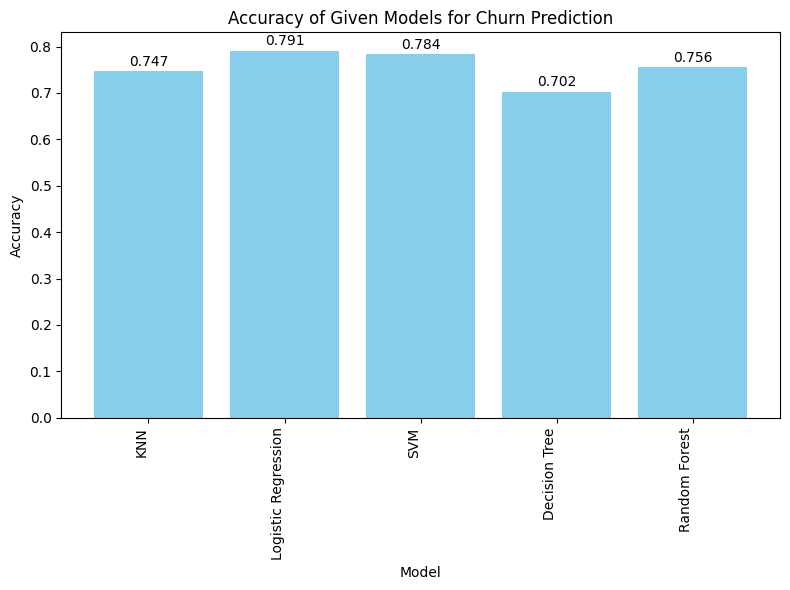

In [48]:
models = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
accuracy = [knn, logistic_regression, svm, decision_tree, random_forest]

plt.figure(figsize=(8,6))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Given Models for Churn Prediction')

for i, score in enumerate(accuracies):
    plt.text(i, score + 0.005, f'{score:.3f}', ha='center', va='bottom')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Conclusion:

- KNN achieved an accuracy of 74.7%
- Logistic Regression achieved an accuracy of 79.1%
- Support Vector Machines achieved an accuracy of 78.4%
- Decision Trees achieved an accuracy of 71.5%
- Random Forest achieved an accuracy of 76.3%

The algorithm with the highest accuracy is "Logistic Regression" with an accuracy of 79.1%. Therefore, for churn prediction based on the provided data and model evaluation, Logistic Regression is the recommended choice.